In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
import pandas as pd

data = pd.read_csv('combined_1.csv', parse_dates=['DATE'], index_col='DATE')


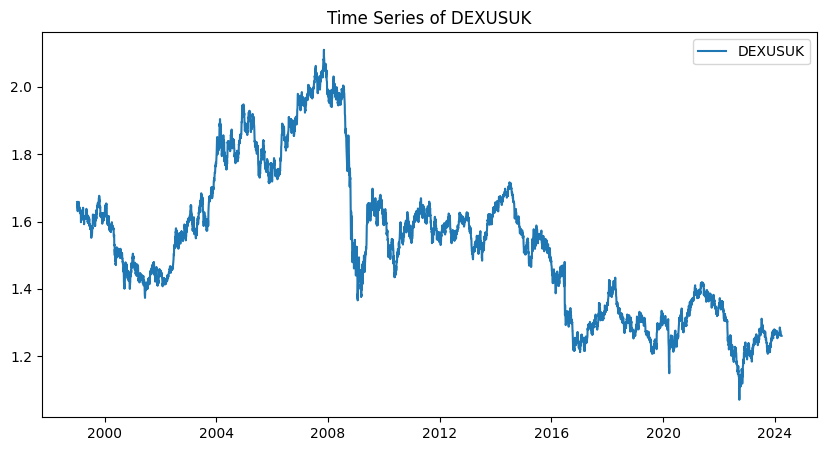

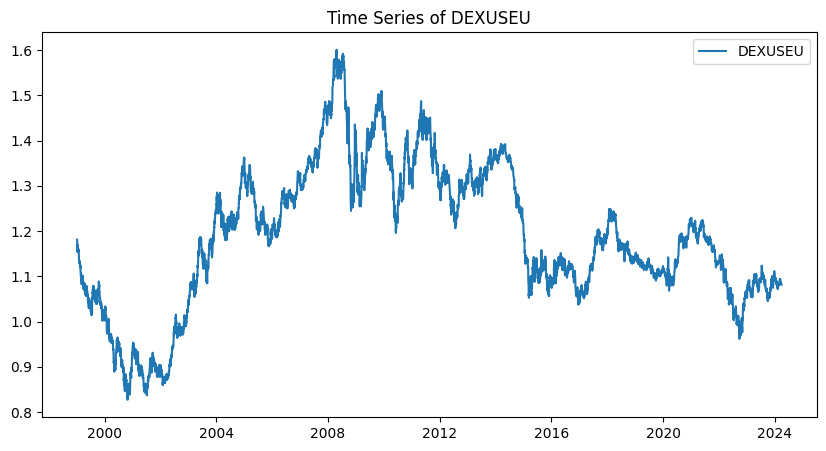

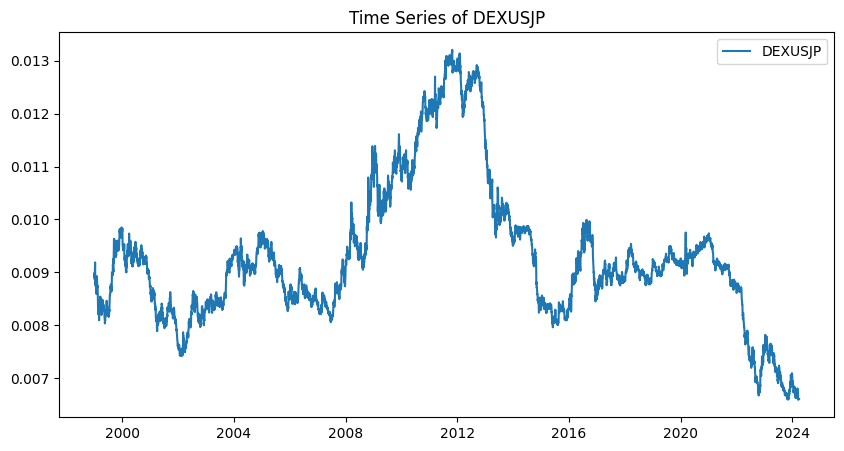

In [3]:
import matplotlib.pyplot as plt

columns = ['DEXUSUK', 'DEXUSEU', 'DEXUSJP']
for column in columns:
    plt.figure(figsize=(10, 5))
    plt.plot(data[column], label=column)
    plt.title(f'Time Series of {column}')
    plt.legend()
    plt.show()


In [4]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out.to_string())
    print('Result:', 'Stationary' if result[1] <= 0.05 else 'Non-Stationary')
    print()

for column in columns:
    adf_test(data[column], title=column)


Augmented Dickey-Fuller Test: DEXUSUK
ADF Test Statistic               -1.319821
p-value                           0.620056
#Lags Used                       11.000000
Number of Observations Used    6658.000000
Critical Value (1%)              -3.431333
Critical Value (5%)              -2.861974
Critical Value (10%)             -2.567001
Result: Non-Stationary

Augmented Dickey-Fuller Test: DEXUSEU
ADF Test Statistic               -1.742222
p-value                           0.409500
#Lags Used                        1.000000
Number of Observations Used    6668.000000
Critical Value (1%)              -3.431331
Critical Value (5%)              -2.861974
Critical Value (10%)             -2.567001
Result: Non-Stationary

Augmented Dickey-Fuller Test: DEXUSJP
ADF Test Statistic               -1.147645
p-value                           0.695703
#Lags Used                        0.000000
Number of Observations Used    6669.000000
Critical Value (1%)              -3.431331
Critical Value (5%)  

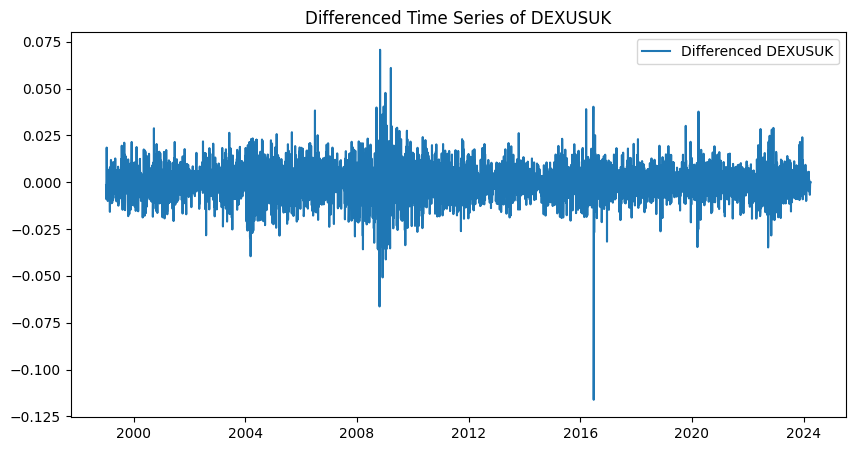

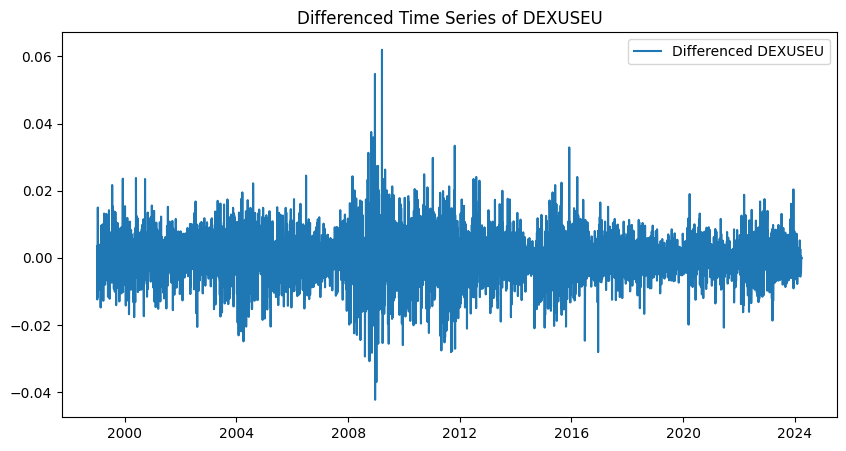

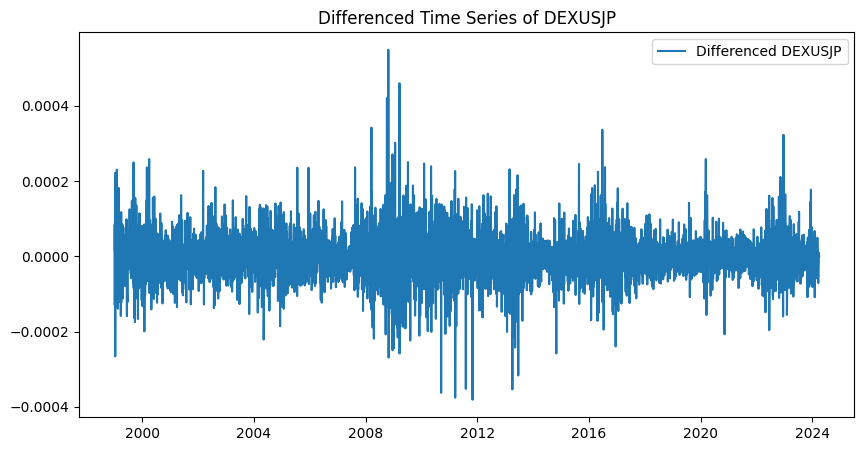

In [5]:
differenced_data = data.diff().dropna()

for column in columns:
    plt.figure(figsize=(10, 5))
    plt.plot(differenced_data[column], label=f'Differenced {column}')
    plt.title(f'Differenced Time Series of {column}')
    plt.legend()
    plt.show()


In [6]:
for column in columns:
    adf_test(differenced_data[column], title=f'Differenced {column}')
#

Augmented Dickey-Fuller Test: Differenced DEXUSUK
ADF Test Statistic              -25.999106
p-value                           0.000000
#Lags Used                       10.000000
Number of Observations Used    6658.000000
Critical Value (1%)              -3.431333
Critical Value (5%)              -2.861974
Critical Value (10%)             -2.567001
Result: Stationary

Augmented Dickey-Fuller Test: Differenced DEXUSEU
ADF Test Statistic              -79.621763
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    6668.000000
Critical Value (1%)              -3.431331
Critical Value (5%)              -2.861974
Critical Value (10%)             -2.567001
Result: Stationary

Augmented Dickey-Fuller Test: Differenced DEXUSJP
ADF Test Statistic              -81.885579
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    6668.000000
Critical Value (1%)              -3.

In [7]:
differenced_data

,SPX_Adj_Close,SPX_Volume,DowJonesClose,GDPC1,GFDEBTN,M2SL,MEDCPIM158SFRBCLE,NASDAQ_Close,NETFI,PCECTPI,DEXUSUK,DEXUSJP,DEXUSEU
DATE,,,,,,,,,,,,,
1999-01-05,16.680053,-102000000.0,126.92,0.0,0.0,0.0,0.000000,43.22,0.0,0.0,-0.0015,0.000080,-0.0052
1999-01-06,27.559937,211900000.0,233.78,0.0,0.0,0.0,0.000000,69.59,0.0,0.0,-0.0019,-0.000130,-0.0124
1999-01-07,-2.609986,-123900000.0,-7.21,0.0,0.0,0.0,0.000000,5.23,0.0,0.0,-0.0052,0.000087,0.0036
1999-01-08,5.359986,74800000.0,105.56,0.0,0.0,0.0,0.000000,18.32,0.0,0.0,-0.0090,0.000014,-0.0118
1999-01-11,-11.209961,-119800000.0,-23.43,0.0,0.0,0.0,0.000000,40.18,0.0,0.0,-0.0030,0.000222,-0.0020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-25,-15.990235,-43340000.0,-162.26,0.0,0.0,0.0,-0.003801,-44.35,0.0,0.0,0.0000,0.000000,0.0000
2024-03-26,-14.609863,540430000.0,-31.31,0.0,0.0,0.0,-0.003801,-68.77,0.0,0.0,0.0000,0.000000,0.0000
2024-03-27,44.910156,-21290000.0,477.75,0.0,0.0,0.0,-0.003801,83.82,0.0,0.0,0.0000,0.000000,0.0000


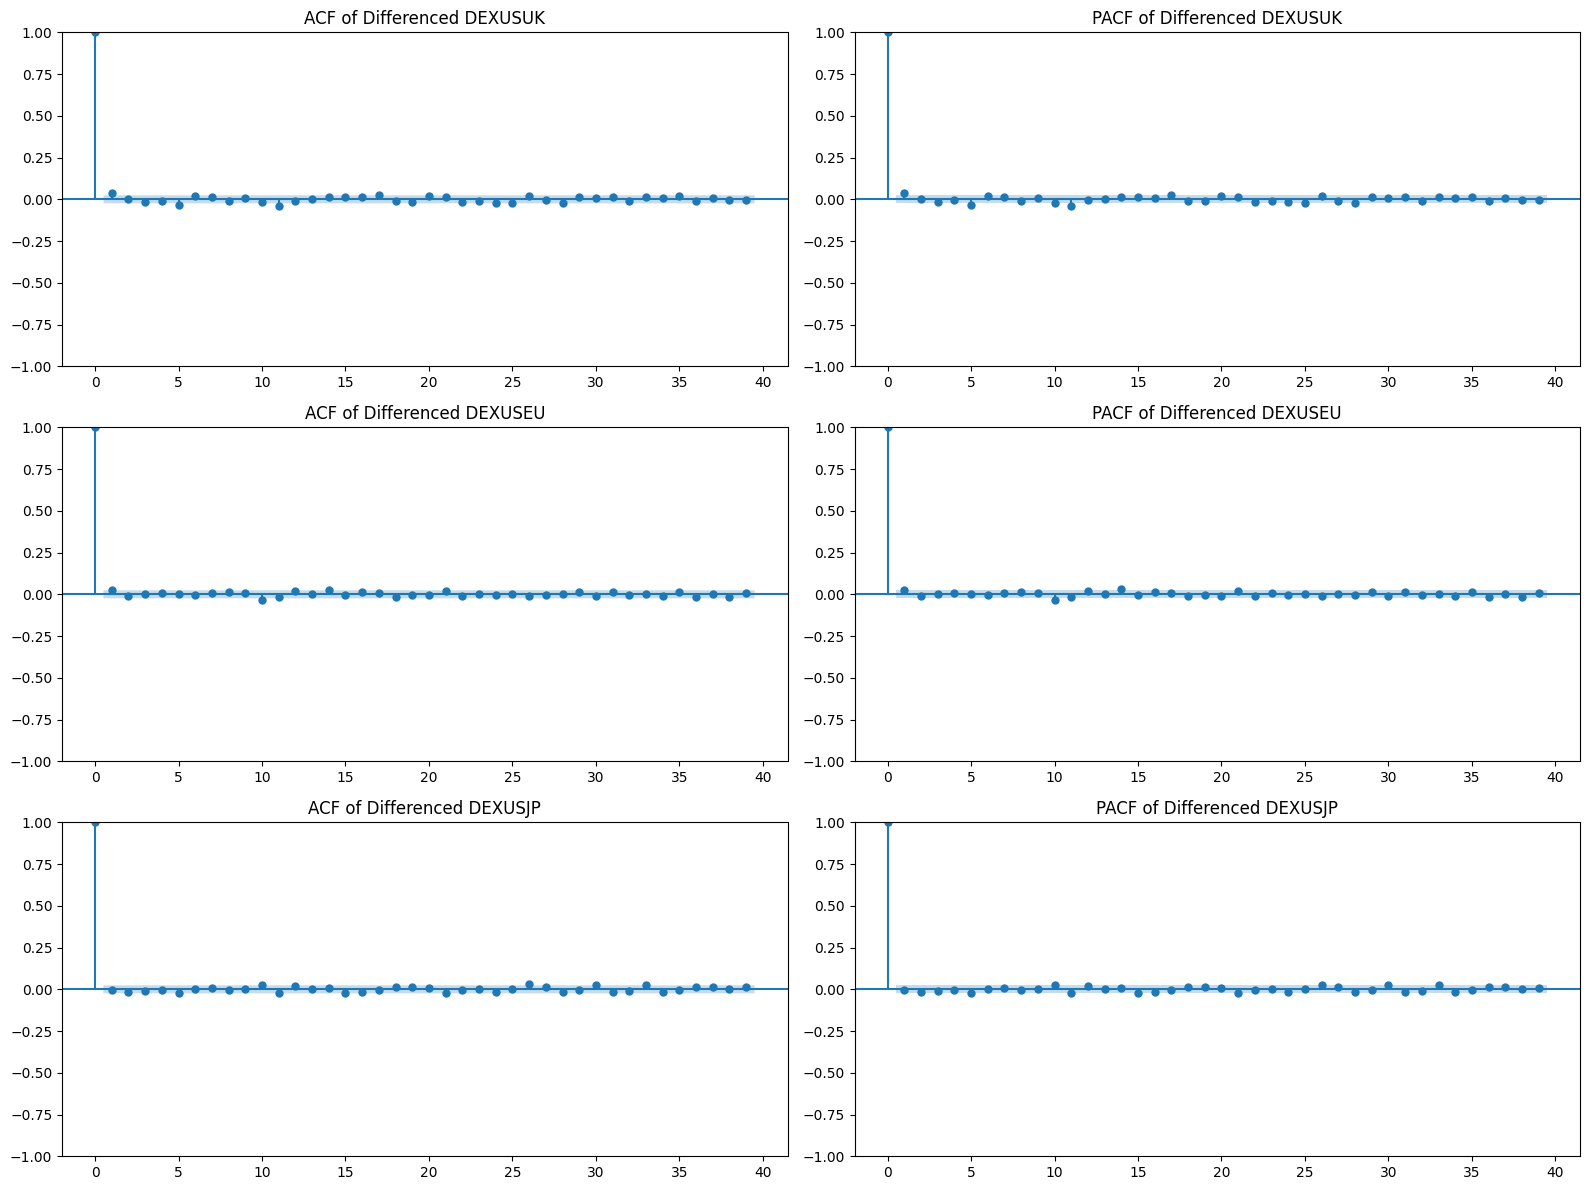

In [31]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Select the target columns to apply ARIMA on
columns = ['DEXUSUK', 'DEXUSEU', 'DEXUSJP']

# Differencing the data to make it stationary
differenced_data = data[columns].diff().dropna()

# Plotting the ACF and PACF for the differenced data
fig, axes = plt.subplots(nrows=len(columns), ncols=2, figsize=(16, 12))

for i, column in enumerate(columns):
    plot_acf(differenced_data[column], ax=axes[i, 0], title=f'ACF of Differenced {column}')
    plot_pacf(differenced_data[column], ax=axes[i, 1], title=f'PACF of Differenced {column}')

plt.tight_layout()
plt.show()


In [40]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
data = pd.read_csv('combined_1.csv', parse_dates=['DATE'], index_col='DATE')

# Select the target columns to apply ARIMAX on
target_columns = ['DEXUSUK', 'DEXUSEU', 'DEXUSJP']
# Select the feature columns (exogenous variables)
feature_columns = data.columns.difference(target_columns)

# Print the initial shape of the data
print(f'Initial data shape: {data.shape}')


Initial data shape: (6670, 13)


In [41]:
# Differencing the target columns to make them stationary
differenced_data = data[target_columns].diff().dropna()

# Combine differenced target columns with other predictors
combined_data = pd.concat([differenced_data, data[feature_columns].iloc[1:]], axis=1)

# Drop any rows with NaNs that might have appeared due to misalignment in merging
combined_data.dropna(inplace=True)

# Print the shape of the combined data
print(f'Combined data shape after differencing: {combined_data.shape}')


Combined data shape after differencing: (6669, 13)


In [42]:
# Split the combined data into 80% training and 20% testing
split_ratio = 0.8
split_point = int(len(combined_data) * split_ratio)
train_data = combined_data.iloc[:split_point]
test_data = combined_data.iloc[split_point:]

# Separate the exogenous variables for training and testing
train_exog = train_data[feature_columns]
test_exog = test_data[feature_columns]

# Print shapes to debug
print(f'Train data shape: {train_data.shape}')
print(f'Test data shape: {test_data.shape}')
print(f'Train exogenous shape: {train_exog.shape}')
print(f'Test exogenous shape: {test_exog.shape}')


Train data shape: (5335, 13)
Test data shape: (1334, 13)
Train exogenous shape: (5335, 10)
Test exogenous shape: (1334, 10)


In [43]:
# Fit ARIMAX models on training data
models = {}
for column in target_columns:
    try:
        model = SARIMAX(train_data[column], order=(1, 1, 1), exog=train_exog)
        fitted_model = model.fit(disp=False)
        models[column] = fitted_model
        print(f'Summary of ARIMAX model for {column}')
        print(fitted_model.summary())
    except Exception as e:
        print(f'Error fitting ARIMAX model for {column}: {e}')


Summary of ARIMAX model for DEXUSUK
                               SARIMAX Results                                
Dep. Variable:                DEXUSUK   No. Observations:                 5335
Model:               SARIMAX(1, 1, 1)   Log Likelihood               17220.364
Date:                Thu, 30 May 2024   AIC                         -34414.727
Time:                        01:06:38   BIC                         -34329.163
Sample:                             0   HQIC                        -34384.837
                               - 5335                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
 DowJonesClose    -8.268e-06   1.11e-06     -7.421      0.000   -1.05e-05   -6.08e-06
GDPC1              1.658e-05   2.69e-08    616.778      0.000    1.65e-05 

In [44]:
# Forecast on the testing set
forecasts = {}
for column in target_columns:
    try:
        n_test = len(test_data[column])
        forecast = models[column].forecast(steps=n_test, exog=test_exog)
        forecasts[column] = forecast
        print(f'Forecast for {column} generated successfully with shape {forecast.shape}')
    except Exception as e:
        print(f'Error forecasting for {column}: {e}')

# Convert forecasts to DataFrame and handle potential NaNs
forecast_df = pd.DataFrame(forecasts, index=test_data.index)

# Print forecast_df shape to debug
print(f'Forecast data shape before dropping NaNs: {forecast_df.shape}')

# Ensure there are no NaNs in the forecasted data
forecast_df.dropna(inplace=True)

# Print forecast_df shape to debug
print(f'Forecast data shape after dropping NaNs: {forecast_df.shape}')


Forecast for DEXUSUK generated successfully with shape (1334,)
Forecast for DEXUSEU generated successfully with shape (1334,)
Forecast for DEXUSJP generated successfully with shape (1334,)
Forecast data shape before dropping NaNs: (1334, 3)
Forecast data shape after dropping NaNs: (0, 3)
